# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

**Answer 1:** 1.	By using “as” when importing a library, we can assign any valid string to the library. This is generally done to shorten code and make it more readable.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [4]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433     

**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

**Answer:** 2.	The method head(int n) of a DataFrame object returns the first n items in the dataframe. If n is null the default number of items returned is 5. The types of each column in df are as follows:
Car: String, MPG: float, Cylinders: int, Displacement: float, Horsepower: float, Weight: int, Acceleration: float, Model: int, Origin: string.


There are different ways of exploring and indexing the table. Here are some examples.

In [11]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.iloc[[0,1,5],0:5])   # uses 'iloc' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

In [81]:
print(df.iloc[-5:])
print(df[-5:])
print(df[df['Cylinders'] == 3]['Car'])

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ran

Now, we are ready to start plotting the data.

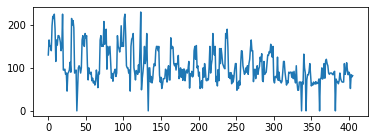

In [35]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

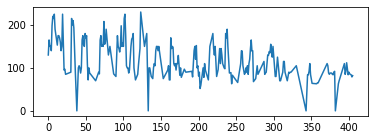

In [50]:
plt.figure(figsize=(6,2))
plt.plot(df['Horsepower'][df['Origin'] == 'US'])

To plot the histogram of a selected attribute:

(array([  4.,   0., 207.,   0.,   3.,   0.,  84.,   0.,   0., 108.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

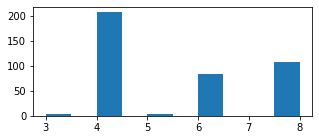

In [79]:
fig = plt.figure(figsize=(5,2))
#plt.hist(df['MPG'], bins=20);   # ; suppresses Out
plt.hist(df['Cylinders'], bins=10) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

**Answer:** the historgram for MPG shows that the majority of cars have mpg greater than 15, and as you increase the mpg beyond 15 the number of cars with this mpg decreases exponentially. The preferred number of bins for MPG is 20 because it is divides the data among a healthy number of bins but also displays a smooth slope as mpg changes.

the histogram for Cylinders shows that the majority of cars in the dataset have 4 cylinders, in fact the number of cars with 4 cylinders is close to the number of cars with all other cylinders. It also shows that very few cars have an odd number of cylinders. The ideal number of bins for cylinders is 10, because there is a small amount of diversity between the number of cylinders that cars have, and 10 bins allow each number to be represented individually on the graph without "squishing" the data too much by creating unnecessary space between used bins.

The following code provides statistics for number of cylinders.

In [90]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

In [98]:
# prints the number of cars from the US with 'y' cylinders
print(pd.crosstab(index=df[df['Origin']=='US']['Origin'], columns=df['Cylinders']))

Cylinders   4   6    8
Origin                
US         72  74  108


Horizontal bar plot:

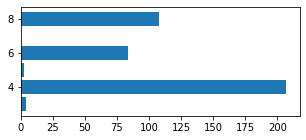

In [116]:
plt.figure(figsize=(5,2))
plt.barh(t.index, t['count']);


**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

<BarContainer object of 5 artists>

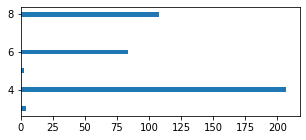

In [128]:
plt.figure(figsize=(5,2))
plt.barh(t.index, t['count'], 0.25)

Pie chart:

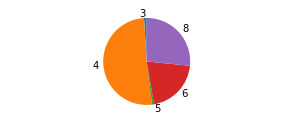

In [129]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

**Answer:** I prefer the horizontal bar display for this data because it shows the total number of cars with each cylinder rather than the percentage. Overall, I find it easier to read in this case.

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

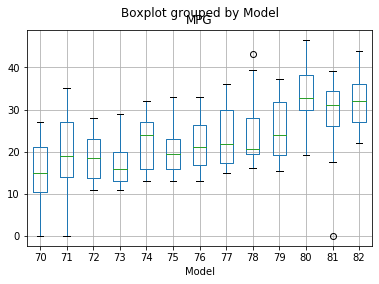

In [130]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

**Answer:** From this graph we can see how the median and mean mpg increased over time.

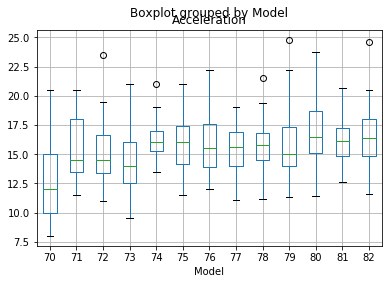

In [142]:
df.boxplot(column='Acceleration',by='Model');

**Answer:** The rate of acceleration also increased steadily over time, but not as quickly or drastically as mpg. This suggests that developments in technology helped influence the increase in mpg over time or helped diminish the degree of change in acceleration when mpg is increased. 

Scatterplot between MPG and Weight attributes:

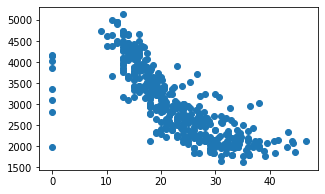

In [140]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

**Answer:** The scatterplot shows the correlation between weight and mpg. By decreasing the weight of a car, we exponentially increase its miles per gallon.

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

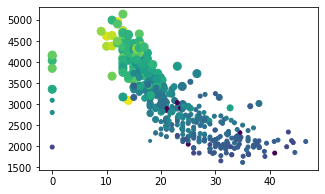

In [146]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']**2,df['Horsepower']);

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

**Answer:** We can now see that as the weight of the car decreases and the mpg increases, the number of cylinders in the car decreases. Additionally, the horsepower also decreases.

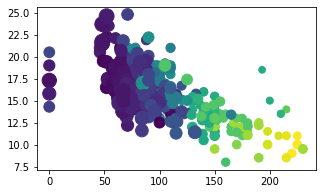

In [158]:
plt.figure(figsize=(5,3))
plt.scatter(df['Horsepower'],df['Acceleration'], df['MPG']*5, df['Displacement'])

**Answer:** This new plot shows that as horsepower of a car is increased, it time to accelerate to a given speed decreases, i.e. its rate of acceleration increases. We can also see the miles per gallon decreasing and displacement increasing with an increase in horsepower.

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

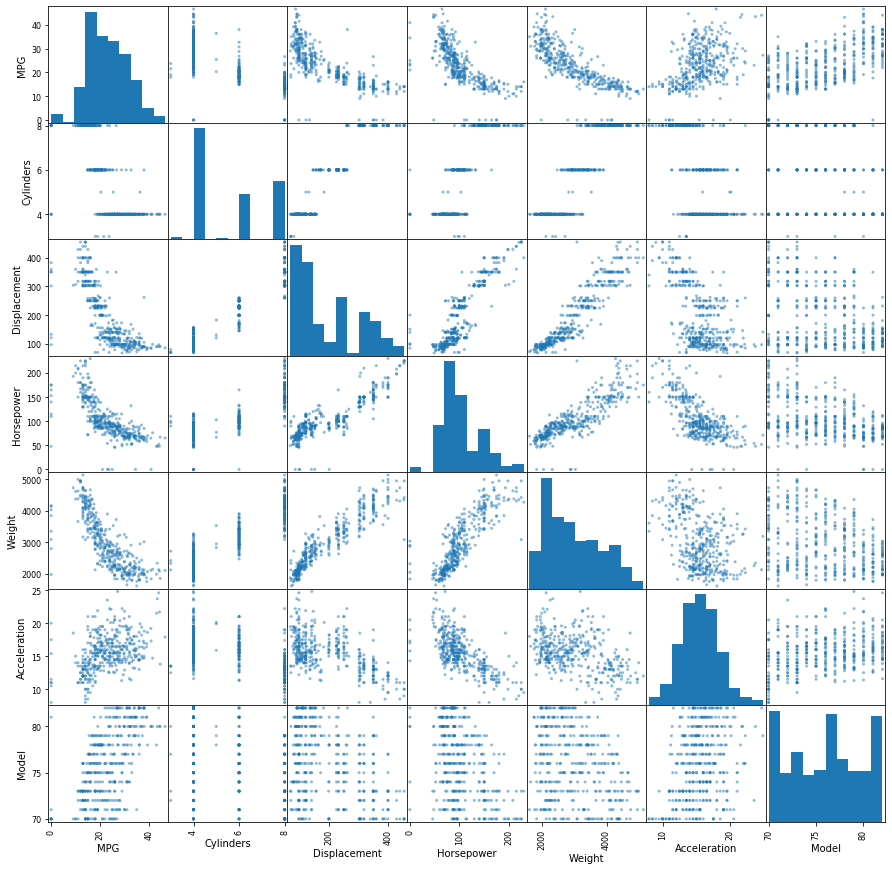

In [159]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.

**Answer:** we are seeing a matrix of all possible (x,y) combinations of column types. The diagonal graphs are histograms for each type, while the rest of the graphs are scattered plots. If you flip any graph in the bottom triangle from right to left, and then rotate it 90 degrees horizontally, it has a matching graph in the top triangle. From these graphs we can see that the weight increases with displacement, acceleration increases slightly with more cylinders (but not significantly), the weight of cars floats around 2000-2500 lbs, and the median displacement is most likely below the mean displacement.